<a href="https://colab.research.google.com/github/SasitornC/LAGCC-Python_Project/blob/main/Python_Capstone_Animal_Shelter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Animal Shelter Analysis**

# **Introduction**

There are around 14,000 independent shelters and rescue groups of which have about 3,500 animals in the United States.(source:vimbuzz.com)


This datasource, I found on Kaggle's website and the data was collected by Austin Animal Center. This analysis will tell how many animals intake to the Austin Animal Center each year and the data will provide analysis to the questions below:

How many types of animal intake into the shelter? 

What are the causes to bring the animals into the shelter? 

Whart are the condition of animals when taken in?

In [ ]:
#Importing libries to execute in this data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [ ]:
#Import the data
df = pd.read_csv('Austin_Animal_Center_Intakes.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [ ]:
#Renaming and replacing column names.
df.rename(columns={"Sex upon Intake": "Gender","Age upon Intake":"Age"})

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Gender,Age,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
124115,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan
124116,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White
124117,A830180,Gigi,03/03/2021 04:31:00 PM,03/03/2021 04:31:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White
124118,A830171,NaN,03/03/2021 05:13:00 PM,03/03/2021 05:13:00 PM,1310 West Howard Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Plott Hound Mix,Brown Brindle/White


In [ ]:
#Drop the columns is not being used in the analysis.
drop_cols = ['DateTime']
df.drop(drop_cols, inplace = True, axis = 1)

# **Animal Accepted to the Shelter Each Year**


Based on the data shown from the year 2013 to 2021, the total animals being intake to the shelter is 124,120 animals. The numbers has been high since 2014 and the highest amount of animal intake is in 2019 which had 19,728 animals. However, the number was decreasing from 2020 to 2021 by 46%. 

In [ ]:
#Use DateTime function for analyzing the year only.
df_year = df['year'] = pd.DatetimeIndex(df['MonthYear']).year
df_year

Int64Index([2019, 2015, 2016, 2013, 2014, 2017, 2019, 2015, 2020, 2018,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='MonthYear', length=124120)

In [ ]:
#Creating new dataframe to focus on.
df2 = df[['Animal ID','Intake Type','Intake Condition','Animal Type','Sex upon Intake','Age upon Intake','Breed', 'year']]
df2.head()

,Animal ID,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,year
0,A786884,Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,2019
1,A706918,Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,2015
2,A724273,Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,2016
3,A665644,Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,2013
4,A682524,Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,2014


In [ ]:
#To see how many intake the animal per year.
df_year.value_counts()

2019    19728
2015    18712
2014    18656
2016    17675
2017    17563
2018    16979
2020     9586
2013     4182
2021     1039
Name: MonthYear, dtype: int64

In [ ]:
#Find the total intake animal to the shelter.
y_total=19728+18712+18656+17675+17563+16979+9586+4182+1039
y_total

124120

In [ ]:
#Calculate the total intake animal from year 2020 to 2021
y_20_21 = 9586+1039
y_20_21

10625

In [ ]:
#Finding the percentage decreasing from 2019 to 2021
decre_19_20_21 = ((19728-10625)/19728)*100
decre_19_20_21 


46.14253852392539

<Figure size 360x360 with 0 Axes>

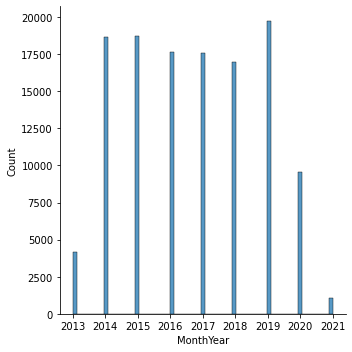

<Figure size 360x360 with 0 Axes>

In [ ]:
#Creating data visualization to see how many intake the animal each year by using the displot.
sns.displot(df_year)
plt.figure(figsize=(5,5))

# **Animal Type resuced**

Austin Animal Center is not only accepting dogs and cats, but also accepting other kinds of animal such as birds, wildlife, livestock, and others. Dogs and cats are the the most living in the shelter. The amount of intake dogs are 70,447 and cats are 46,455.

In [ ]:
#Find the amount of animal type.
df['Animal Type'].value_counts()

Dog          70447
Cat          46455
Other         6610
Bird           586
Livestock       22
Name: Animal Type, dtype: int64

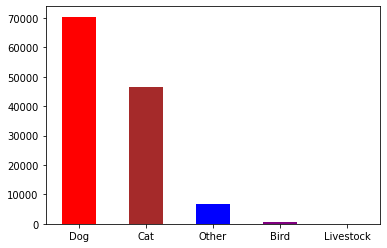

In [ ]:
#Create bar chart to see the amount of animals and specific the color for each one.
df['Animal Type'].value_counts().sort_values(ascending=False).plot(kind = 'bar', rot =0, color=['red','brown','blue','purple','green'])
plt.rc('font', size=13) 

In [ ]:
#The average of all of animal in the shelter record.
df['Animal Type'].value_counts().mean()

24824.0

In [ ]:
df['Animal Type'].value_counts().describe()

count        5.000000
mean     24824.000000
std      31952.026282
min         22.000000
25%        586.000000
50%       6610.000000
75%      46455.000000
max      70447.000000
Name: Animal Type, dtype: float64

# **Cause of Animal Intake to the Shelter**

Based on the data showed, the animal taken in the most into the shelter are stray animals and the owner surrendered. Stray animals have the highest number to 86,455 animals and the owner surrender is more than 24,606.


In [ ]:
#Find the amount of intaking animal.
df2['Intake Type'].value_counts()

Stray                 86455
Owner Surrender       24606
Public Assist          7621
Wildlife               4898
Abandoned               283
Euthanasia Request      257
Name: Intake Type, dtype: int64

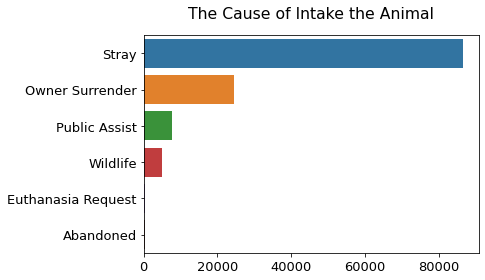

In [ ]:
#Create bar chart to see the amount of the causes of intake the animal.
#Undisplay the x and y lable.
sns.countplot(y='Intake Type', data = df2)
plt.title("The Cause of Intake the Animal", y = 1.05)
plt.ylabel("")
plt.xlabel("")
plt.rc('font', size=10) 


# **Type of Condition when Came in to the Shelter**

There are 87% of animals condition that are normal. Only 13% that included injury, sick, nursing, and others conditions when intake to the shelter.

In [ ]:
#Find the amount of intaking animal condition.
df['Intake Condition'].value_counts()

Normal      107952
Injured       6639
Sick          5078
Nursing       3524
Aged           430
Other          229
Feral          108
Pregnant        77
Medical         63
Behavior        20
Name: Intake Condition, dtype: int64

In [ ]:
#Calculating percentage of animal behavior. 
behav_per = (20/124120)*100
behav_per

0.016113438607798906

In [ ]:
#Calculating the total of animal condition.
condi=107952+6639+5078+3524+430+229+108+77+63+20
condi

124120

In [ ]:
#Calculate the percentage of normal condition.
codi_nor_per =  (107952/124120)*100
codi_nor_per

86.97389622945536

In [ ]:
#Calculating the total of others condition.
other_condi = 6639+5078+3524+430+229+108+77+63+20
other_condi

16168

In [ ]:
#Calculate the percentage of others condition.
other_condi_per = (16168/124120)*100
other_condi_per

13.026103770544633

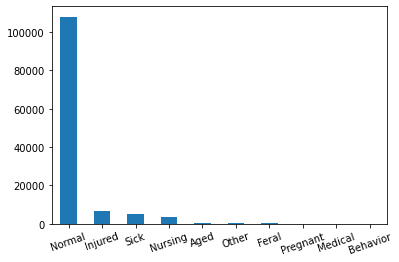

In [ ]:
#Creating the data visualization.
df['Intake Condition'].value_counts().sort_values(ascending=False).plot(kind = 'bar', rot = 19)

In [ ]:
#Finding the animal age inside the shelter.
df_age = df['Age upon Intake'].value_counts()
df_age

1 year       21794
2 years      19030
1 month      11910
3 years       7449
2 months      6733
4 years       4452
4 weeks       4414
5 years       4061
3 weeks       3616
3 months      3276
4 months      3202
5 months      3073
6 years       2714
2 weeks       2498
6 months      2396
7 years       2335
8 years       2281
7 months      1856
10 years      1827
9 months      1824
8 months      1500
9 years       1330
10 months     1027
1 week        1022
1 weeks        888
12 years       879
11 months      795
0 years        754
11 years       745
1 day          635
3 days         578
13 years       575
2 days         478
14 years       383
15 years       335
4 days         324
5 weeks        315
6 days         305
5 days         180
16 years       140
17 years        82
18 years        47
19 years        27
20 years        19
22 years         5
-1 years         5
-2 years         1
25 years         1
23 years         1
24 years         1
21 years         1
-3 years         1
Name: Age up

# **The most type of dogs and cats breeds inside the shelter.**

The data show the top 5 breed of dogs and cats. Mostly the dogs and cats breed are mixed with another breed. 

**Top 5 Breed Dog in the Shelter:**

*   Pit Bull Mix
*   Labrador Retriever Mix
*   Chihuahua Shorthair Mix
*   German Shepherd Mix   
*   Australian Cattle Dog Mix

**Top 5 Breed Cat in the Shelter:**

*   Domestic Shorthair Mix 
*   Domestic Shorthair   
*   Domestic Medium Hair Mix
*   Domestic Longhair Mix 
*  Siamese Mix 

In [ ]:
#Creating new dataframe to analyze only dog data and set of the data columns to display.
df_dog = df['Animal Type']=='Dog'
df3 = df[df_dog]
df3 = df3.filter(['year','Animal Type','Sex upon Intake','Age upon Intake','Breed', 'Color'])
df3.rename(columns={"Sex upon Intake": "Gender","Age upon Intake":"Age"})

,year,Animal Type,Gender,Age,Breed,Color
0,2019,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,2015,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,2016,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,2014,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,2017,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
...,...,...,...,...,...,...
124114,2021,Dog,Intact Female,2 years,Pit Bull,Black/White
124115,2021,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan
124116,2021,Dog,Intact Female,1 month,Chihuahua Shorthair,White
124117,2021,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White


In [ ]:
#Creating new dataframe to analyze only cat data and set of the data columns to display.
df_cat = df['Animal Type']=='Cat'
df4 = df[df_cat]
df4 = df4.filter(['year','Animal Type','Sex upon Intake','Age upon Intake','Breed', 'Color'])
df4.rename(columns={"Sex upon Intake": "Gender","Age upon Intake":"Age"})

,year,Animal Type,Gender,Age,Breed,Color
3,2013,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
8,2020,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby
9,2018,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Black/White
10,2016,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby
14,2019,Cat,Intact Female,4 years,Domestic Shorthair Mix,Brown Tabby/White
...,...,...,...,...,...,...
124085,2021,Cat,Intact Female,3 days,Domestic Shorthair,Torbie
124088,2021,Cat,Intact Female,2 years,Domestic Shorthair,Brown Tabby
124091,2021,Cat,Intact Male,3 weeks,Domestic Shorthair,White/Blue Tabby
124106,2021,Cat,Intact Male,4 months,Domestic Shorthair Mix,Black/White


In [ ]:
#Researching the most dog breed in the shelter.
df3['Breed'].value_counts()

Pit Bull Mix                                  8407
Labrador Retriever Mix                        6861
Chihuahua Shorthair Mix                       6238
German Shepherd Mix                           3003
Australian Cattle Dog Mix                     1511
                                              ... 
English Cocker Spaniel                           1
Swedish Vallhund                                 1
Bruss Griffon/Affenpinscher                      1
Chihuahua Shorthair/Shiba Inu                    1
Border Terrier/Soft Coated Wheaten Terrier       1
Name: Breed, Length: 2326, dtype: int64

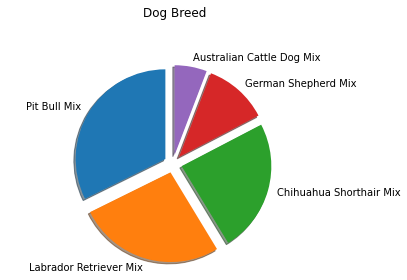

In [ ]:
#Using Pie chart to show the analysis.
labels = ['Pit Bull Mix', 'Labrador Retriever Mix','Chihuahua Shorthair Mix','German Shepherd Mix','Australian Cattle Dog Mix']
sizes= [8407, 6861, 6238, 3003, 1511]
plt.pie(sizes,labels=labels, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1),)
plt.axis('equal')
plt.title('Dog Breed', y = 1.15)
#plt.legend(bbox_to_anchor = (1.2,1), loc='upper left')
plt.rc('font', size=12) 

In [ ]:
#Top 5 Breed of Cat in the Shelter
df4['Breed'].value_counts()

Domestic Shorthair Mix           30985
Domestic Shorthair                7006
Domestic Medium Hair Mix          3115
Domestic Longhair Mix             1540
Siamese Mix                       1279
                                 ...  
Domestic Shorthair/Abyssinian        1
Tonkinese                            1
Turkish Angora                       1
Angora/Persian                       1
Snowshoe/Siamese                     1
Name: Breed, Length: 100, dtype: int64

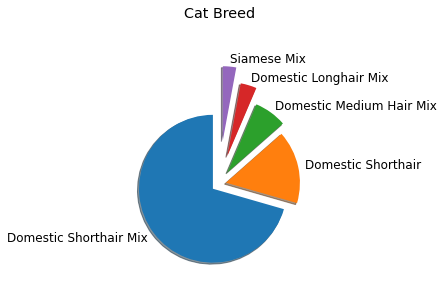

In [ ]:
#Using Pie chart to show the analysis.
labels = ['Domestic Shorthair Mix', 'Domestic Shorthair  ','Domestic Medium Hair Mix','Domestic Longhair Mix','Siamese Mix']
sizes= [30985, 7006, 3115, 1540, 1279]
plt.pie(sizes,labels=labels, startangle=90, shadow=True,explode=(0.1, 0.1, 0.2, 0.4,0.6))
plt.axis('equal')
plt.title('Cat Breed', y = 1.15)
#plt.legend(bbox_to_anchor = (1.2,1), loc='upper left')
plt.rc('font', size=12) 

# **Conclusion**


This analysis shows the number intake was decreasing from 2020 to 2021 by 46%.  It is possible that people stayed home more during that time and they are more considerate about adopting the animals. This could be the cause of decreasing in number.

The first and second range are stray animals are owner surrender. Stray dog, can be from lost animal; therefore, the owner should put the microchip on the pets and put the collar on and include the owner's number on it in case they get lost . Nobody wants to surrender their own animal, but there are so many reasons they choose this way; for example, lack of finances, unruly animal behavior, and no time to take care of the pet. 

Finally, there are so many healthy animals which are ready to be moved to their forever new home. By saving the animal's life it will give them more chances to have a forever home and a better life. These animal are waiting for the forever family.

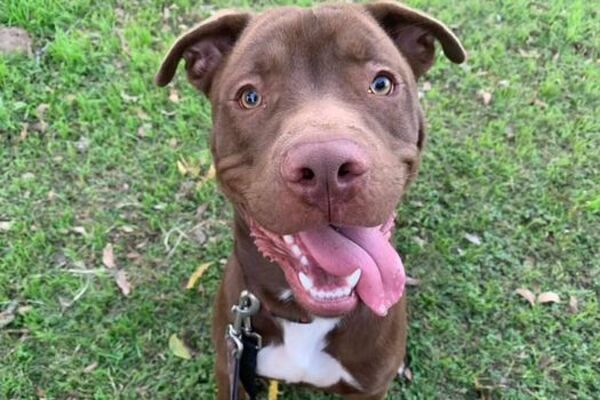